# Wind Speed Vs Wind Stress
# May 23, 2017

In [62]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from salishsea_tools import gsw_calls
import xarray as xr
import numpy.ma as ma
import cmocean 
import netCDF4 as nc
from salishsea_tools import (
    nc_tools,
    viz_tools,
)

In [255]:
bathy = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
mesh_mask = xr.open_dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone2.nc')
new_domain = mesh_mask.tmask.isel(y=slice(334,898), x = slice(114,398))

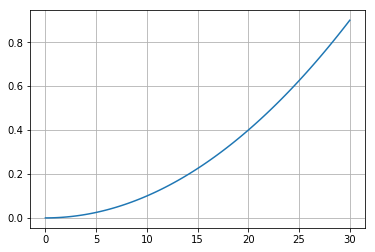

In [3]:
Q0 = 10**3
C =  10**(-3)
Qa = 1

windspeed = np.linspace(0,30,100)
windstress = windspeed**2 * Qa * C / Q0 * Q0 

plt.plot(windspeed,windstress)
plt.grid('on')

# January with rr_vtau = 0.1, -0.1

In [53]:
WN010T = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanN0.1/SalishSea_1h_20170101_20170102_grid_T.nc')
WN010V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanN0.1/SalishSea_1h_20170101_20170102_grid_V.nc')
WS010T = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanS0.1/SalishSea_1h_20170101_20170102_grid_T.nc')
WS010V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanS0.1/SalishSea_1h_20170101_20170102_grid_V.nc')

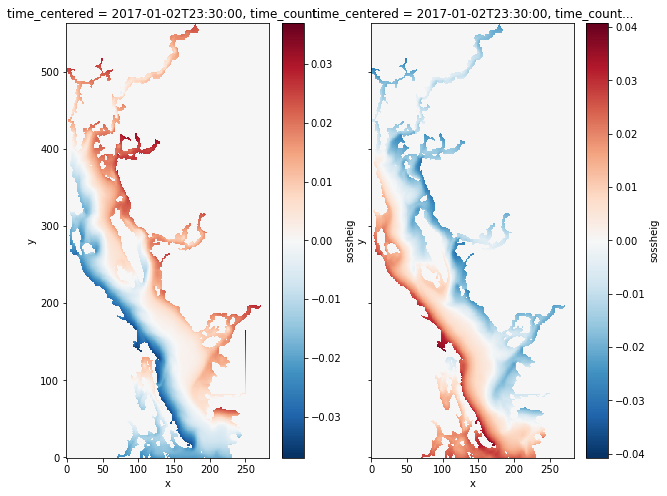

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey = True,figsize = (10,8))
WN010T.sossheig.isel(time_counter = 47).plot(ax=ax1)
WS010T.sossheig.isel(time_counter = 47).plot(ax=ax2)

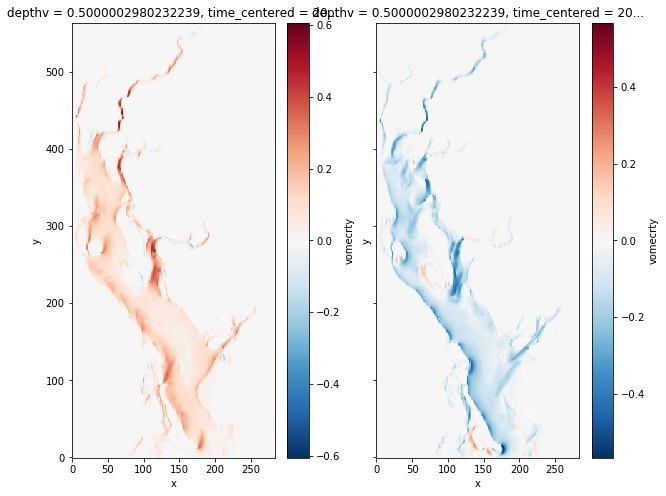

In [11]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize = (10,8))
WN010V.vomecrty.isel(depthv = 0,time_counter = 47).plot(ax = ax1)
WS010V.vomecrty.isel(depthv = 0,time_counter = 47).plot(ax = ax2)

In [153]:
WN010V2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanN0.1/SalishSea_1h_20170101_20170102_grid_V.nc')
WS010V2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanS0.1/SalishSea_1h_20170101_20170102_grid_V.nc')

vgrid1 = WN010V2.variables['vomecrty']
zlevels1 = WN010V2.variables['depthv']
timesteps1 = WN010V2.variables['time_counter']

vgrid2 = WS010V2.variables['vomecrty']
zlevels2 = WS010V2.variables['depthv']
timesteps2 = WS010V2.variables['time_counter']

density1 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WN010T.vosaline.isel(y=350,time_counter=47).values,
                                        WN010T.votemper.isel(y=350,time_counter=47).values,
                                        np.array(0)])
density2 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WS010T.vosaline.isel(y=350,time_counter=47).values,
                                        WS010T.votemper.isel(y=350,time_counter=47).values,
                                        np.array(0)])

In [267]:
masked_density1 = ma.masked_where(new_domain.isel(y=350,t=0)==0,density1)
masked_density2 = ma.masked_where(new_domain.isel(y=350,t=0)==0,density2)

(10, 84)

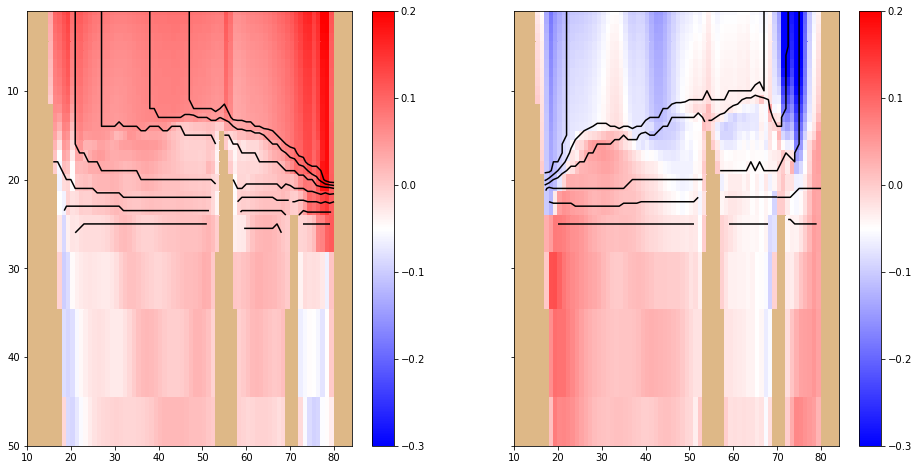

In [261]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,8))
land_colour = 'burlywood'

t, zmax, ylocn = 47, 50, 350
section_slice = np.arange(10, 85)
timestamp = nc_tools.timestamp(WN010V2, t)

vgrid_tzyx1 = np.ma.masked_values(vgrid1[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(
    section_slice[:], zlevels1[:zmax], vgrid_tzyx1,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax1.invert_yaxis
cbar = fig.colorbar(mesh, ax=ax1)
ax1.contour(masked_density1,colors = 'black')
ax1.set_xlim((10,84))
ax1.set_ylim((1,50))

vgrid_tzyx2 = np.ma.masked_values(vgrid2[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh2 = ax2.pcolormesh(
    section_slice[:], zlevels2[:zmax], vgrid_tzyx2,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax2.invert_yaxis()
cbar = fig.colorbar(mesh2, ax=ax2)
ax2.contour(masked_density2,colors = 'black')
ax2.set_xlim((10,84))

In [268]:
density1a = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WN010T.vosaline.isel(y=180,time_counter=47).values,
                                        WN010T.votemper.isel(y=180,time_counter=47).values,
                                        np.array(0)])
density2a = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WS010T.vosaline.isel(y=180,time_counter=47).values,
                                        WS010T.votemper.isel(y=180,time_counter=47).values,
                                        np.array(0)])
masked_density1a = ma.masked_where(new_domain.isel(y=180,t=0)==0, density1a)
masked_density2a = ma.masked_where(new_domain.isel(y=180,t=0)==0, density2a)

(75, 259)

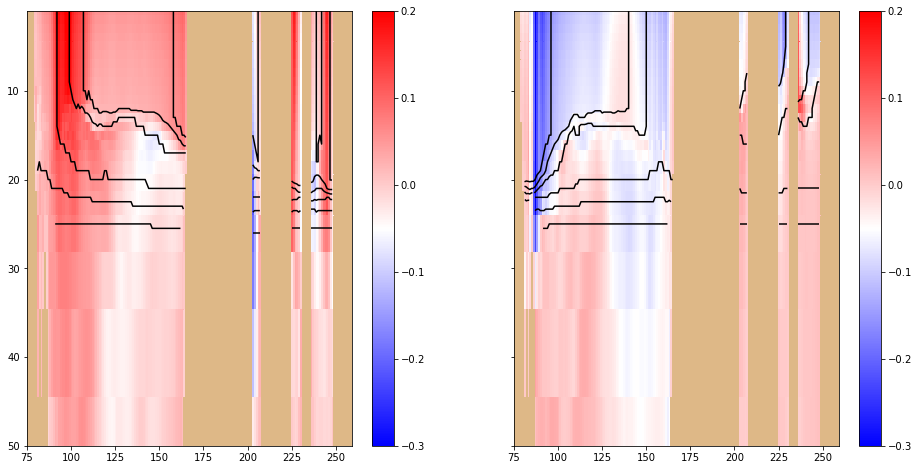

In [275]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,8))
land_colour = 'burlywood'

t, zmax, ylocn = 47, 50, 180
section_slice = np.arange(75, 260)
timestamp = nc_tools.timestamp(WN010V2, t)

vgrid_tzyx1 = np.ma.masked_values(vgrid1[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(
    section_slice[:], zlevels1[:zmax], vgrid_tzyx1,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax1.invert_yaxis
cbar = fig.colorbar(mesh, ax=ax1)
ax1.contour(masked_density1a,colors='black')
ax1.set_ylim((1,50))
ax1.set_xlim((75,259))

vgrid_tzyx2 = np.ma.masked_values(vgrid2[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax2.pcolormesh(
    section_slice[:], zlevels2[:zmax], vgrid_tzyx2,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax2.invert_yaxis()
cbar = fig.colorbar(mesh, ax=ax2)
ax2.contour(masked_density2a,colors='black')
ax2.set_xlim((75,259))

# June with rr_vtau = 0.1, -0.1

In [216]:
SN010T = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JunN0.1/SalishSea_1h_20160601_20160602_grid_T.nc')
SN010V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JunN0.1/SalishSea_1h_20160601_20160602_grid_V.nc')
SS010T = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JunS0.1/SalishSea_1h_20160601_20160602_grid_T.nc')
SS010V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JunS0.1/SalishSea_1h_20160601_20160602_grid_V.nc')

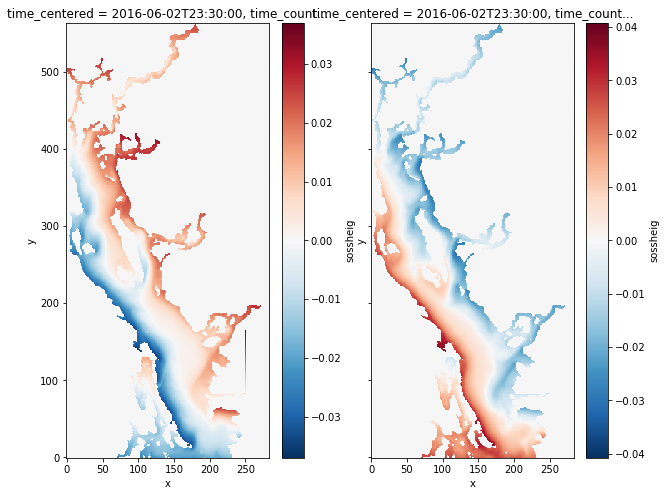

In [51]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey = True,figsize = (10,8))
SN010T.sossheig.isel(time_counter = 47).plot(ax=ax1)
SS010T.sossheig.isel(time_counter = 47).plot(ax=ax2)

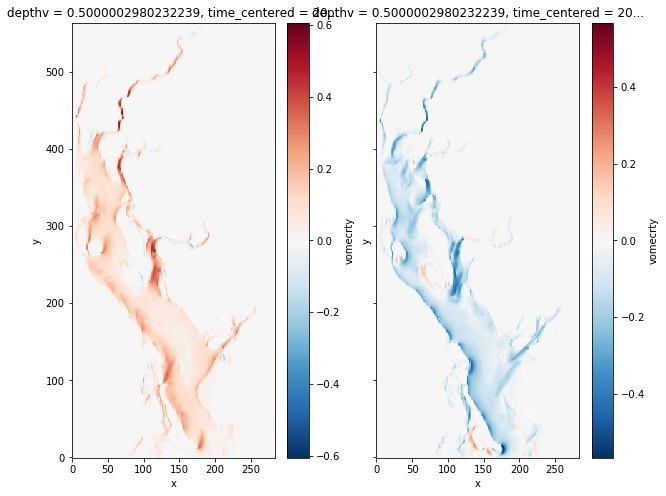

In [52]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize = (10,8))
SN010V.vomecrty.isel(depthv = 0,time_counter = 47).plot(ax = ax1)
SS010V.vomecrty.isel(depthv = 0,time_counter = 47).plot(ax = ax2)

In [276]:
SN010V2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunN0.1/SalishSea_1h_20160601_20160602_grid_V.nc')
SS010V2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunS0.1/SalishSea_1h_20160601_20160602_grid_V.nc')

vgrida = SN010V2.variables['vomecrty']
zlevelsa = SN010V2.variables['depthv']
timestepsa = SN010V2.variables['time_counter']

vgridb = SS010V2.variables['vomecrty']
zlevelsb = SS010V2.variables['depthv']
timestepsb = SS010V2.variables['time_counter']

density3 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SN010T.vosaline.isel(y=350,time_counter=47).values,
                                        SN010T.votemper.isel(y=350,time_counter=47).values,
                                        np.array(0)])
density4 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SS010T.vosaline.isel(y=350,time_counter=47).values,
                                        SS010T.votemper.isel(y=350,time_counter=47).values,
                                        np.array(0)])

masked_density3 = ma.masked_where(new_domain.isel(y=350,t=0)==0, density3)
masked_density4 = ma.masked_where(new_domain.isel(y=350,t=0)==0, density4)

(10, 84)

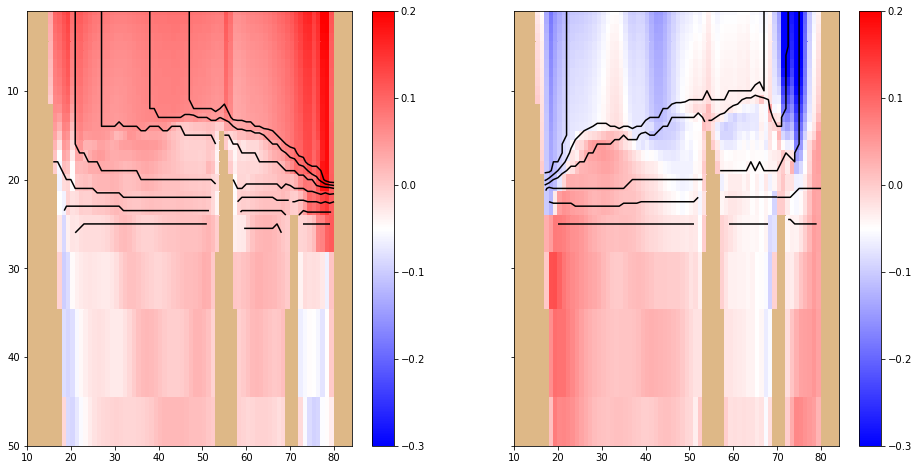

In [281]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,8))
land_colour = 'burlywood'

t, zmax, ylocn = 47, 50, 350
section_slice = np.arange(10, 85)
timestamp = nc_tools.timestamp(SN010V2, t)

vgrid_tzyxa = np.ma.masked_values(vgrida[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(
    section_slice[:], zlevelsa[:zmax], vgrid_tzyxa,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax1.invert_yaxis
cbar = fig.colorbar(mesh, ax=ax1)
ax1.contour(masked_density3,colors='black')
ax1.set_xlim((10,84))
ax1.set_ylim((1,50))

vgrid_tzyxb = np.ma.masked_values(vgridb[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax2.pcolormesh(
    section_slice[:], zlevelsb[:zmax], vgrid_tzyxb,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax2.invert_yaxis()
cbar = fig.colorbar(mesh, ax=ax2)
ax2.contour(masked_density4,colors='black')
ax2.set_xlim((10,84))

In [282]:
density3a = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SN010T.vosaline.isel(y=180,time_counter=47).values,
                                        SN010T.votemper.isel(y=180,time_counter=47).values,
                                        np.array(0)])
density4a = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SS010T.vosaline.isel(y=180,time_counter=47).values,
                                        SS010T.votemper.isel(y=180,time_counter=47).values,
                                        np.array(0)])

masked_density3a = ma.masked_where(new_domain.isel(y=180,t=0)==0, density3a)
masked_density4a = ma.masked_where(new_domain.isel(y=180,t=0)==0, density4a)

(75, 259)

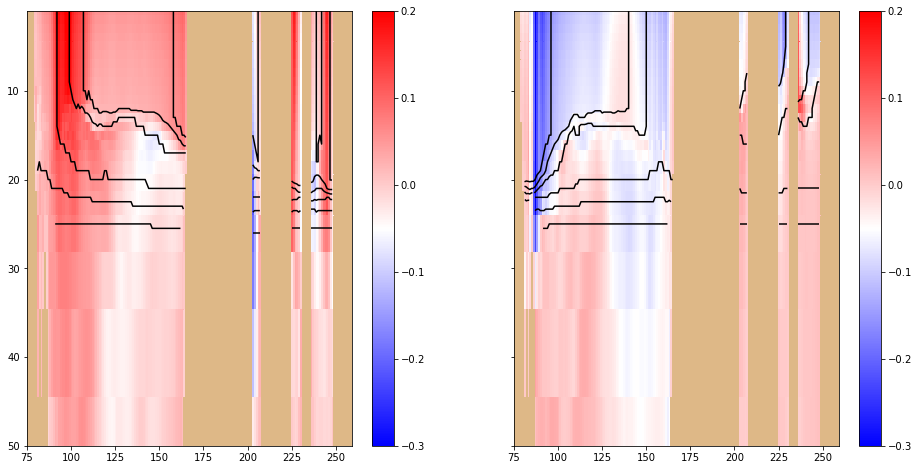

In [286]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,8))
land_colour = 'burlywood'

t, zmax, ylocn = 47, 50, 180
section_slice = np.arange(75, 260)
timestamp = nc_tools.timestamp(SN010V2, t)

vgrid_tzyxa = np.ma.masked_values(vgrida[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(
    section_slice[:], zlevelsa[:zmax], vgrid_tzyxa,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
cbar = fig.colorbar(mesh, ax=ax1)
ax1.contour(masked_density3a,colors='black')
ax1.set_xlim(75,259)
ax1.set_ylim((50,1))

vgrid_tzyxb = np.ma.masked_values(vgridb[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax2.pcolormesh(
    section_slice[:], zlevelsb[:zmax], vgrid_tzyxb,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
cbar = fig.colorbar(mesh, ax=ax2)
ax2.contour(masked_density4a,colors='black')
ax2.set_xlim(75,259)

# Jan with rr_vtau = 0.05, -0.05

In [288]:
WN005T = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanN0.05/SalishSea_1h_20170101_20170102_grid_T.nc')
WN005V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanN0.05/SalishSea_1h_20170101_20170102_grid_V.nc')
WS005T = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanS0.05/SalishSea_1h_20170101_20170102_grid_T.nc')
WS005V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanS0.05/SalishSea_1h_20170101_20170102_grid_V.nc')

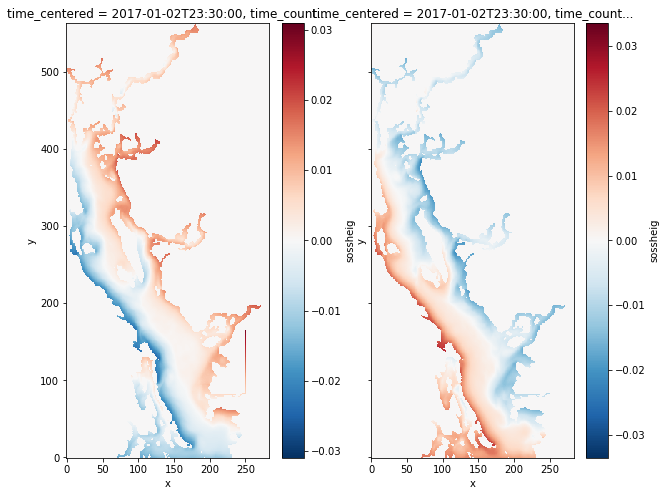

In [56]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey = True,figsize = (10,8))
WN005T.sossheig.isel(time_counter = 47).plot(ax=ax1)
WS005T.sossheig.isel(time_counter = 47).plot(ax=ax2)

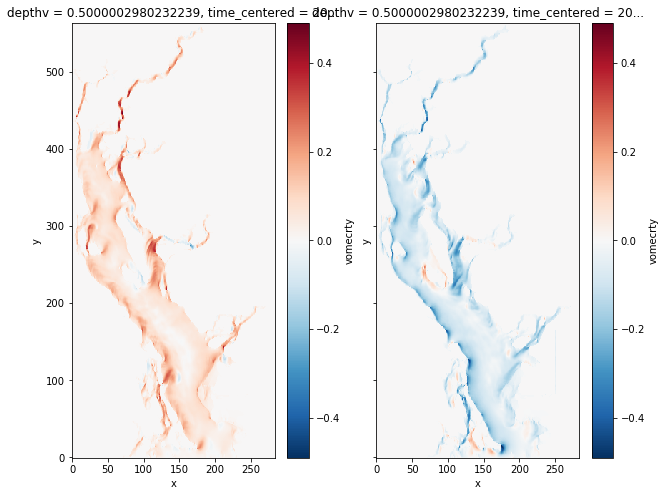

In [57]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize = (10,8))
WN005V.vomecrty.isel(depthv = 0,time_counter = 47).plot(ax = ax1)
WS005V.vomecrty.isel(depthv = 0,time_counter = 47).plot(ax = ax2)

In [291]:
WN005V2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunN0.1/SalishSea_1h_20160601_20160602_grid_V.nc')
WS005V2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunS0.1/SalishSea_1h_20160601_20160602_grid_V.nc')

vgridaa = WN005V2.variables['vomecrty']
zlevelsaa = WN005V2.variables['depthv']
timestepsaa = WN005V2.variables['time_counter']

vgridbb = WS005V2.variables['vomecrty']
zlevelsbb = WS005V2.variables['depthv']
timestepsbb = WS005V2.variables['time_counter']

density5 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WN005T.vosaline.isel(y=180,time_counter=47).values,
                                        WN005T.votemper.isel(y=180,time_counter=47).values,
                                        np.array(0)])
density6 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WS005T.vosaline.isel(y=180,time_counter=47).values,
                                        WS005T.votemper.isel(y=180,time_counter=47).values,
                                        np.array(0)])

masked_density5 = ma.masked_where(new_domain.isel(y=180,t=0)==0, density5)
masked_density6 = ma.masked_where(new_domain.isel(y=180,t=0)==0, density6)

(75, 259)

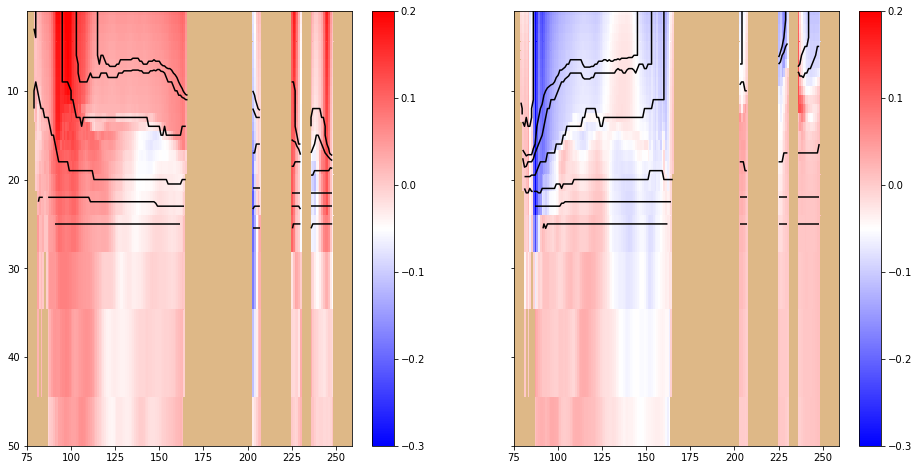

In [293]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,8))
land_colour = 'burlywood'

t, zmax, ylocn = 47, 50, 180
section_slice = np.arange(75, 260)
timestamp = nc_tools.timestamp(WN005V2, t)

vgrid_tzyxaa = np.ma.masked_values(vgridaa[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(
    section_slice[:], zlevelsaa[:zmax], vgrid_tzyxaa,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
cbar = fig.colorbar(mesh, ax=ax1)
ax1.contour(masked_density5,colors='black')
ax1.set_ylim((50,1))
ax1.set_xlim((75,259))

vgrid_tzyxbb = np.ma.masked_values(vgridbb[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax2.pcolormesh(
    section_slice[:], zlevelsbb[:zmax], vgrid_tzyxbb,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
cbar = fig.colorbar(mesh, ax=ax2)
ax2.contour(masked_density6,colors='black')
ax2.set_xlim((75,259))

In [296]:
density5a = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SN010T.vosaline.isel(y=350,time_counter=47).values,
                                        SN010T.votemper.isel(y=350,time_counter=47).values,
                                        np.array(0)])
density6a = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SS010T.vosaline.isel(y=350,time_counter=47).values,
                                        SS010T.votemper.isel(y=350,time_counter=47).values,
                                        np.array(0)])

masked_density5a = ma.masked_where(new_domain.isel(y=350,t=0)==0, density5a)
masked_density6a = ma.masked_where(new_domain.isel(y=350,t=0)==0, density6a)

(10, 84)

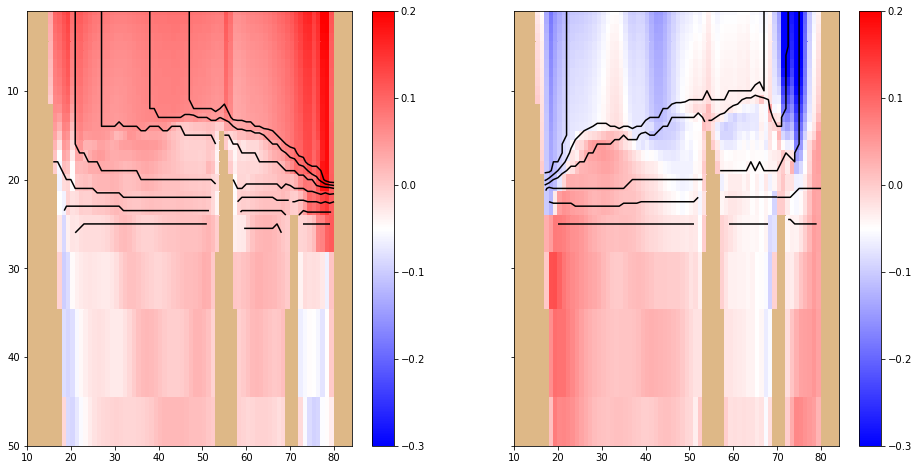

In [297]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,8))
land_colour = 'burlywood'

t, zmax, ylocn = 47, 50, 350
section_slice = np.arange(10, 85)
timestamp = nc_tools.timestamp(WN005V2, t)

vgrid_tzyxaa = np.ma.masked_values(vgridaa[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(
    section_slice[:], zlevelsaa[:zmax], vgrid_tzyxaa,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
cbar = fig.colorbar(mesh, ax=ax1)
ax1.contour(masked_density5a,colors='black')
ax1.set_xlim((10,84))
ax1.set_ylim((50,1))

vgrid_tzyxbb = np.ma.masked_values(vgridbb[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax2.pcolormesh(
    section_slice[:], zlevelsbb[:zmax], vgrid_tzyxbb,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
cbar = fig.colorbar(mesh, ax=ax2)
ax2.contour(masked_density6a,colors='black')
ax2.set_xlim((10,84))

# June with rr_vtau = 0.05, -0.05

In [298]:
SN005T = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JunN0.05/SalishSea_1h_20160601_20160602_grid_T.nc')
SN005V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JunN0.05/SalishSea_1h_20160601_20160602_grid_V.nc')
SS005T = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JunS0.05/SalishSea_1h_20160601_20160602_grid_T.nc')
SS005V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JunS0.05/SalishSea_1h_20160601_20160602_grid_V.nc')

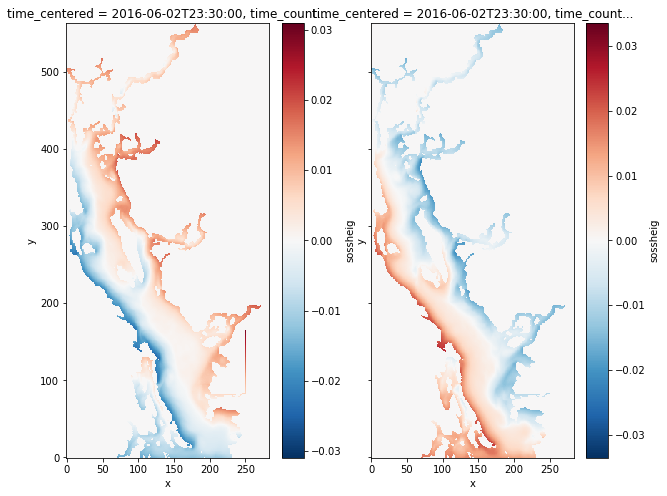

In [99]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey = True,figsize = (10,8))
SN005T.sossheig.isel(time_counter = 47).plot(ax=ax1)
SS005T.sossheig.isel(time_counter = 47).plot(ax=ax2)

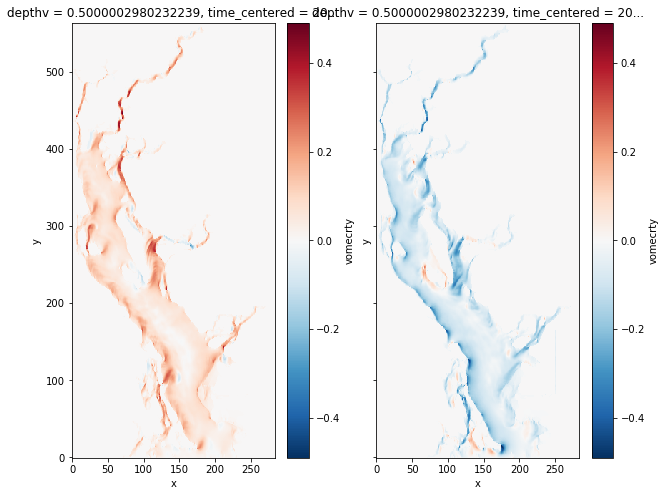

In [100]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize = (10,8))
SN005V.vomecrty.isel(depthv = 0,time_counter = 47).plot(ax = ax1)
SS005V.vomecrty.isel(depthv = 0,time_counter = 47).plot(ax = ax2)

In [299]:
SN005V2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunN0.1/SalishSea_1h_20160601_20160602_grid_V.nc')
SS005V2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunS0.1/SalishSea_1h_20160601_20160602_grid_V.nc')

vgrid01 = SN005V2.variables['vomecrty']
zlevels01 = SN005V2.variables['depthv']
timesteps01 = SN005V2.variables['time_counter']

vgrid02 = SS005V2.variables['vomecrty']
zlevels02 = SS005V2.variables['depthv']
timesteps02 = SS005V2.variables['time_counter']

density7 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SN005T.vosaline.isel(y=350,time_counter=47).values,
                                        SN005T.votemper.isel(y=350,time_counter=47).values,
                                        np.array(0)])
density8 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SS005T.vosaline.isel(y=350,time_counter=47).values,
                                        SS005T.votemper.isel(y=350,time_counter=47).values,
                                        np.array(0)])

masked_density7 = ma.masked_where(new_domain.isel(y=350,t=0)==0, density7)
masked_density8 = ma.masked_where(new_domain.isel(y=350,t=0)==0, density8)

(10, 84)

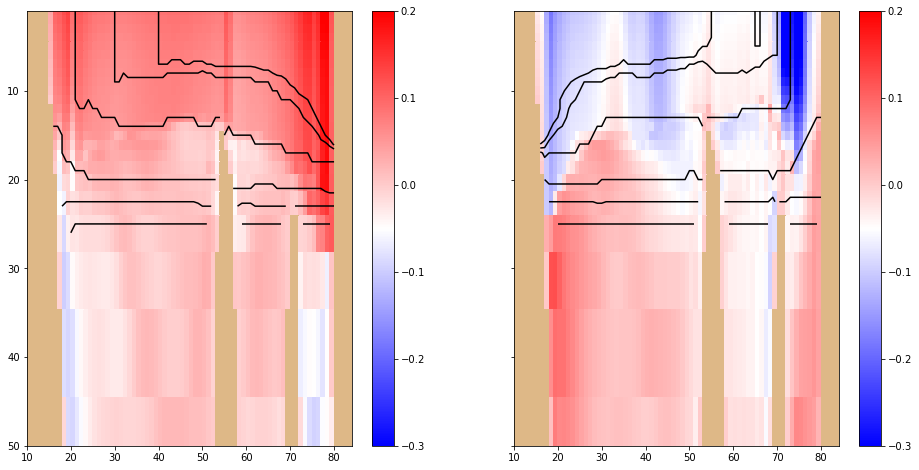

In [300]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,8))
land_colour = 'burlywood'

t, zmax, ylocn = 47, 50, 350
section_slice = np.arange(10, 85)
timestamp = nc_tools.timestamp(SN005V2, t)

vgrid_tzyx01 = np.ma.masked_values(vgrid01[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(
    section_slice[:], zlevels01[:zmax], vgrid_tzyx01,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
cbar = fig.colorbar(mesh, ax=ax1)
ax1.contour(masked_density7,colors='black')
ax1.set_xlim((10,84))
ax1.set_ylim((50,1))

vgrid_tzyx02 = np.ma.masked_values(vgrid02[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax2.pcolormesh(
    section_slice[:], zlevels02[:zmax], vgrid_tzyx02,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
cbar = fig.colorbar(mesh, ax=ax2)
ax2.contour(masked_density8,colors='black')
ax2.set_xlim((10,84))

In [302]:
density7a = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SN005T.vosaline.isel(y=180,time_counter=47).values,
                                        SN005T.votemper.isel(y=180,time_counter=47).values,
                                        np.array(0)])
density8a = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SS005T.vosaline.isel(y=180,time_counter=47).values,
                                        SS005T.votemper.isel(y=180,time_counter=47).values,
                                        np.array(0)])

masked_density7a = ma.masked_where(new_domain.isel(y=180,t=0)==0, density7a)
masked_density8a = ma.masked_where(new_domain.isel(y=180,t=0)==0, density8a)

(75, 259)

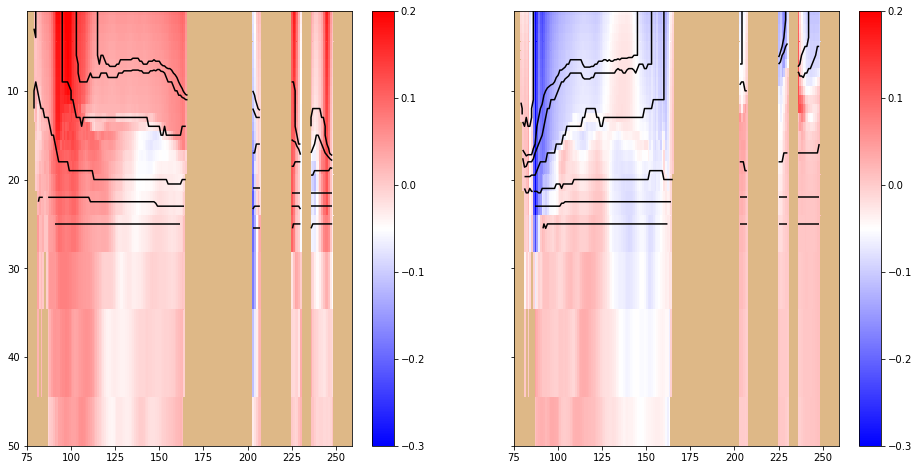

In [303]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,8))
land_colour = 'burlywood'

t, zmax, ylocn = 47, 50, 180
section_slice = np.arange(75, 260)
timestamp = nc_tools.timestamp(SN005V2, t)

vgrid_tzyx01 = np.ma.masked_values(vgridaa[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(
    section_slice[:], zlevels01[:zmax], vgrid_tzyx01,
    cmap=cmap, vmin=-0.3, vmax=0.2)
cbar = fig.colorbar(mesh, ax=ax1)
ax1.contour(masked_density7a,colors='black')
ax1.set_xlim((75,259))
ax1.set_ylim((50,1))

vgrid_tzyx02 = np.ma.masked_values(vgrid02[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax2.pcolormesh(
    section_slice[:], zlevels02[:zmax], vgrid_tzyx02,
    cmap=cmap, vmin=-0.3, vmax=0.2)
cbar = fig.colorbar(mesh, ax=ax2)
ax2.contour(masked_density8a,colors='black')
ax2.set_xlim((75,259))

# January with rr_vtau = 0.02, -0.02

In [304]:
WN002T = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanN0.02/SalishSea_1h_20170101_20170102_grid_T.nc')
WN002V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanN0.02/SalishSea_1h_20170101_20170102_grid_V.nc')
WS002T = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanS0.02/SalishSea_1h_20170101_20170102_grid_T.nc')
WS002V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanS0.02/SalishSea_1h_20170101_20170102_grid_V.nc')

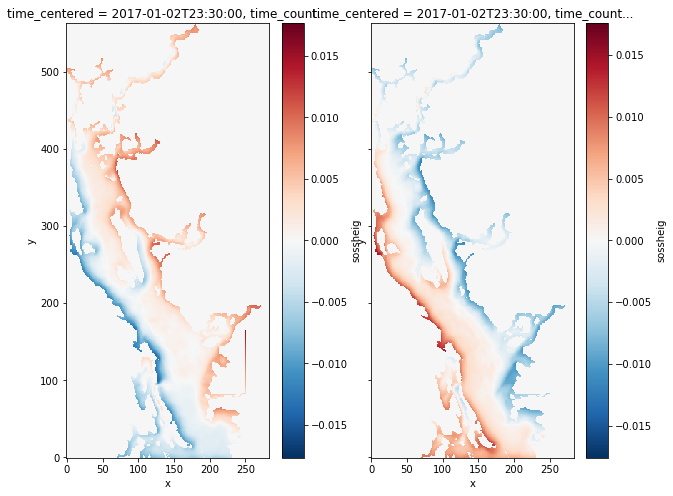

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey = True,figsize = (10,8))
WN002T.sossheig.isel(time_counter = 47).plot(ax=ax1)
WS002T.sossheig.isel(time_counter = 47).plot(ax=ax2)

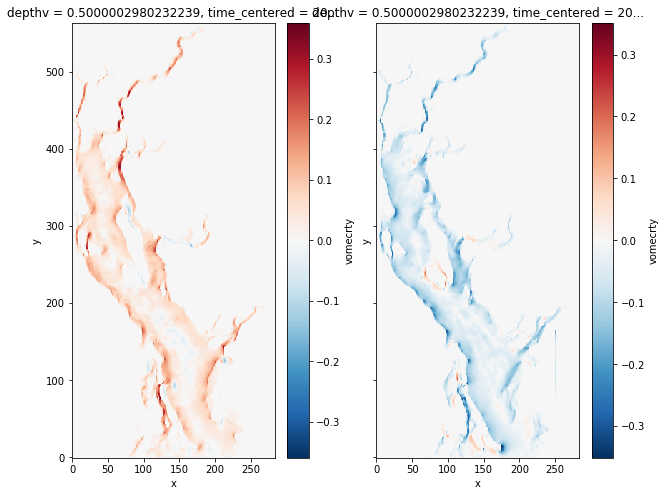

In [33]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey = True,figsize = (10,8))
WN002V.vomecrty.isel(time_counter = 47,depthv = 0).plot(ax=ax1)
WS002V.vomecrty.isel(time_counter = 47, depthv = 0).plot(ax=ax2)

In [305]:
density9 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WN002T.vosaline.isel(y=350,time_counter=47).values,
                                        WN002T.votemper.isel(y=350,time_counter=47).values,
                                        np.array(0)])
density10 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WS002T.vosaline.isel(y=350,time_counter=47).values,
                                        WS002T.votemper.isel(y=350,time_counter=47).values,
                                        np.array(0)])

masked_density9 = ma.masked_where(new_domain.isel(y=350,t=0)==0, density9)
masked_density10 = ma.masked_where(new_domain.isel(y=350,t=0)==0, density10)

(10, 84)

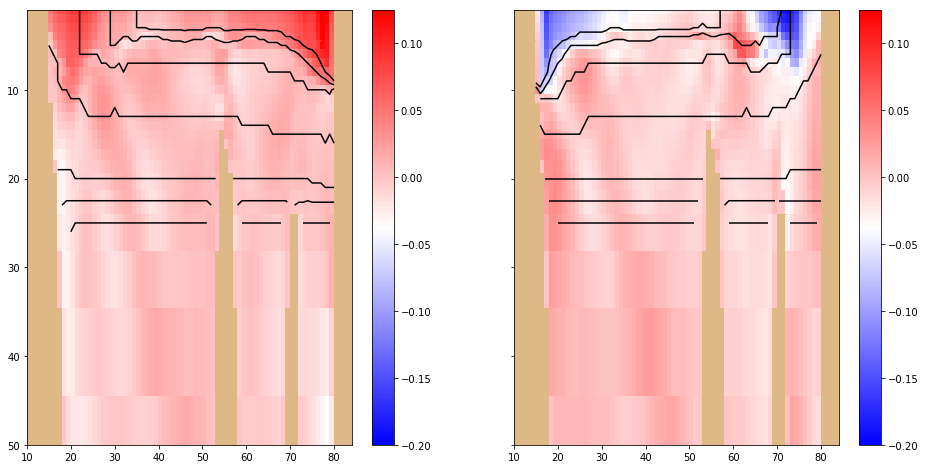

In [307]:
WN002V2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanN0.02/SalishSea_1h_20170101_20170102_grid_V.nc')
WS002V2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanS0.02/SalishSea_1h_20170101_20170102_grid_V.nc')

vgrid03 = WN002V2.variables['vomecrty']
zlevels03 = WN002V2.variables['depthv']
timesteps03 = WN002V2.variables['time_counter']

vgrid04 = WS002V2.variables['vomecrty']
zlevels04 = WS002V2.variables['depthv']
timesteps04 = WS002V2.variables['time_counter']

fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,8))
land_colour = 'burlywood'

t, zmax, ylocn = 47, 50, 350
section_slice = np.arange(10, 85)
timestamp = nc_tools.timestamp(SN005V2, t)

vgrid_tzyx03 = np.ma.masked_values(vgrid03[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(
    section_slice[:], zlevels03[:zmax], vgrid_tzyx03,
    cmap=cmap, vmin=-0.2, vmax=0.125)
cbar = fig.colorbar(mesh, ax=ax1)
ax1.contour(masked_density9,colors='black')
ax1.set_xlim((10,84))
ax2.set_ylim((50,1))

vgrid_tzyx04 = np.ma.masked_values(vgrid04[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax2.pcolormesh(
    section_slice[:], zlevels04[:zmax], vgrid_tzyx04,
    cmap=cmap, vmin=-0.2, vmax=0.125)
cbar = fig.colorbar(mesh, ax=ax2)
ax2.contour(masked_density10,colors='black')
ax2.set_xlim((10,84))

In [308]:
density9a = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WN002T.vosaline.isel(y=180,time_counter=47).values,
                                        WN002T.votemper.isel(y=180,time_counter=47).values,
                                        np.array(0)])
density10a = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [WS002T.vosaline.isel(y=180,time_counter=47).values,
                                        WS002T.votemper.isel(y=180,time_counter=47).values,
                                        np.array(0)])

masked_density9a = ma.masked_where(new_domain.isel(y=180,t=0)==0, density9a)
masked_density10a = ma.masked_where(new_domain.isel(y=180,t=0)==0, density10a)

(75, 259)

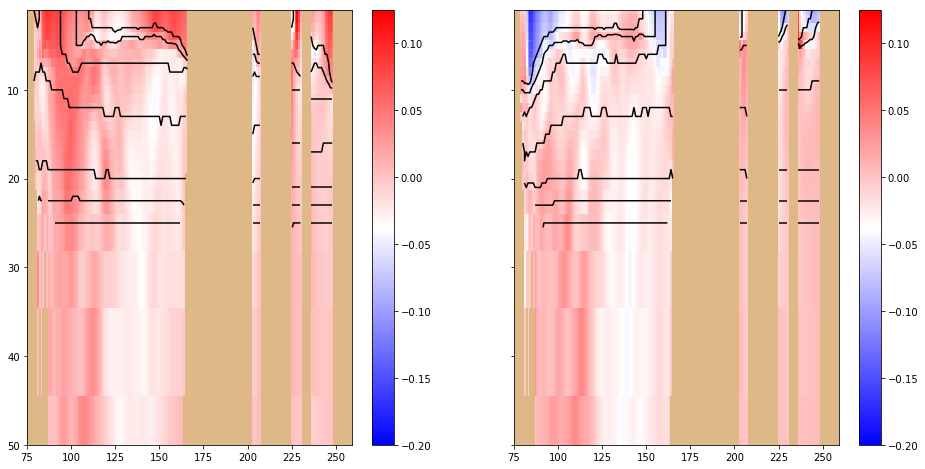

In [311]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,8))
land_colour = 'burlywood'

t, zmax, ylocn = 47, 50, 180
section_slice = np.arange(75, 260)
timestamp = nc_tools.timestamp(SN005V2, t)

vgrid_tzyx03 = np.ma.masked_values(vgrid03[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(
    section_slice[:], zlevels03[:zmax], vgrid_tzyx03,
    cmap=cmap, vmin=-0.2, vmax=0.125)
cbar = fig.colorbar(mesh, ax=ax1)
ax1.contour(masked_density9a,colors='black')
ax1.set_ylim((50,1))
ax1.set_xlim((75,259))

vgrid_tzyx04 = np.ma.masked_values(vgrid04[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax2.pcolormesh(
    section_slice[:], zlevels04[:zmax], vgrid_tzyx04,
    cmap=cmap, vmin=-0.2, vmax=0.125)
cbar = fig.colorbar(mesh, ax=ax2)
ax2.contour(masked_density10a,colors='black')
ax2.set_xlim((75,259))

# June with rr_vtau = 0.02, -0.02

In [312]:
SN002T = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JunN0.02/SalishSea_1h_20160601_20160602_grid_T.nc')
SN002V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JunN0.02/SalishSea_1h_20160601_20160602_grid_V.nc')
SS002T = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JunS0.02/SalishSea_1h_20160601_20160602_grid_T.nc')
SS002V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JunS0.02/SalishSea_1h_20160601_20160602_grid_V.nc')

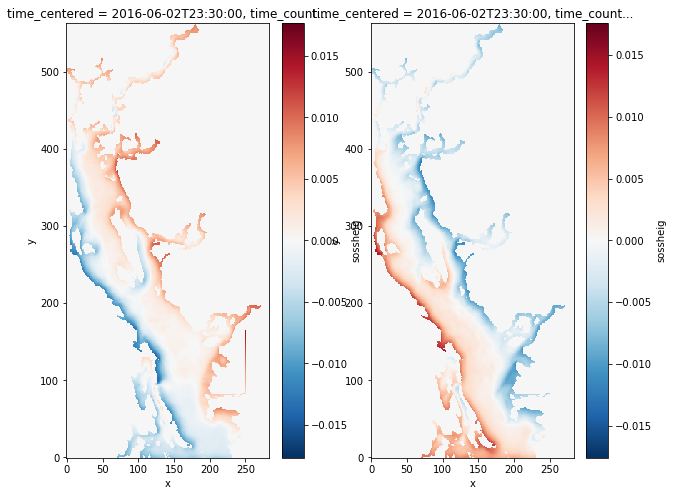

In [76]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,8))
SN002T.sossheig.isel(time_counter=47).plot(ax=ax1)
SS002T.sossheig.isel(time_counter=47).plot(ax=ax2)

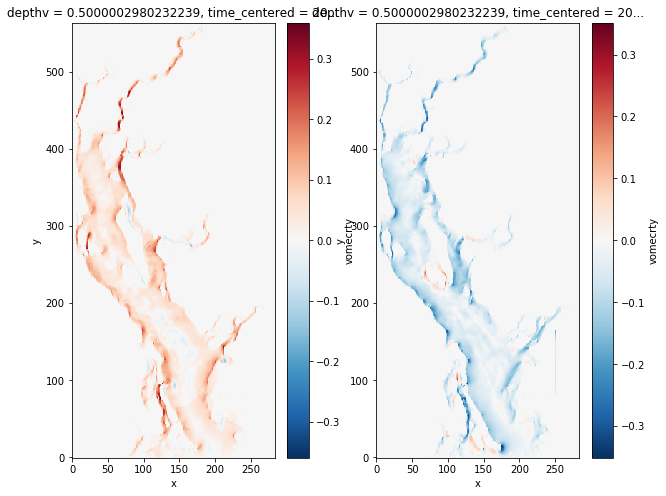

In [77]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,8))
SN002V.vomecrty.isel(time_counter=47,depthv=0).plot(ax=ax1)
SS002V.vomecrty.isel(time_counter=47,depthv=0).plot(ax=ax2)

In [313]:
density11 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SN002T.vosaline.isel(y=350,time_counter=47).values,
                                        SN002T.votemper.isel(y=350,time_counter=47).values,
                                        np.array(0)])
density12 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SS002T.vosaline.isel(y=350,time_counter=47).values,
                                        SS002T.votemper.isel(y=350,time_counter=47).values,
                                        np.array(0)])

masked_density11 = ma.masked_where(new_domain.isel(y=350,t=0)==0, density11)
masked_density12 = ma.masked_where(new_domain.isel(y=350,t=0)==0, density12)

(10, 84)

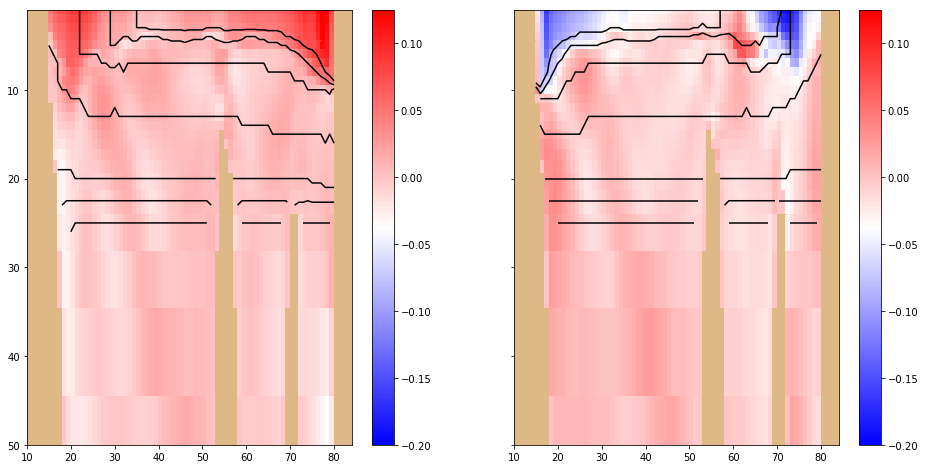

In [314]:
SN002V2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunN0.02/SalishSea_1h_20160601_20160602_grid_V.nc')
SS002V2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunS0.02/SalishSea_1h_20160601_20160602_grid_V.nc')

vgrid05 = SN002V2.variables['vomecrty']
zlevels05 = SN002V2.variables['depthv']
timesteps05 = SN002V2.variables['time_counter']

vgrid06 = SS002V2.variables['vomecrty']
zlevels06 = SS002V2.variables['depthv']
timesteps06 = SS002V2.variables['time_counter']

fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,8))
land_colour = 'burlywood'

t, zmax, ylocn = 47, 50, 350
section_slice = np.arange(10, 85)
timestamp = nc_tools.timestamp(SN002V2, t)

vgrid_tzyx05 = np.ma.masked_values(vgrid05[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(
    section_slice[:], zlevels05[:zmax], vgrid_tzyx05,
    cmap=cmap, vmin=-0.2, vmax=0.125)
cbar = fig.colorbar(mesh, ax=ax1)
ax1.contour(masked_density11,colors='black')
ax1.set_ylim((50,1))
ax1.set_xlim((10,84))

vgrid_tzyx06 = np.ma.masked_values(vgrid06[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax2.pcolormesh(
    section_slice[:], zlevels06[:zmax], vgrid_tzyx06,
    cmap=cmap, vmin=-0.2, vmax=0.125)
cbar = fig.colorbar(mesh, ax=ax2)
ax2.contour(masked_density12,colors='black')
ax2.set_xlim((10,84))

In [315]:
density11a = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SN002T.vosaline.isel(y=180,time_counter=47).values,
                                        SN002T.votemper.isel(y=180,time_counter=47).values,
                                        np.array(0)])
density12a = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [SS002T.vosaline.isel(y=180,time_counter=47).values,
                                        SS002T.votemper.isel(y=180,time_counter=47).values,
                                        np.array(0)])

masked_density11a = ma.masked_where(new_domain.isel(y=180,t=0)==0, density11a)
masked_density12a = ma.masked_where(new_domain.isel(y=180,t=0)==0, density12a)

(75, 259)

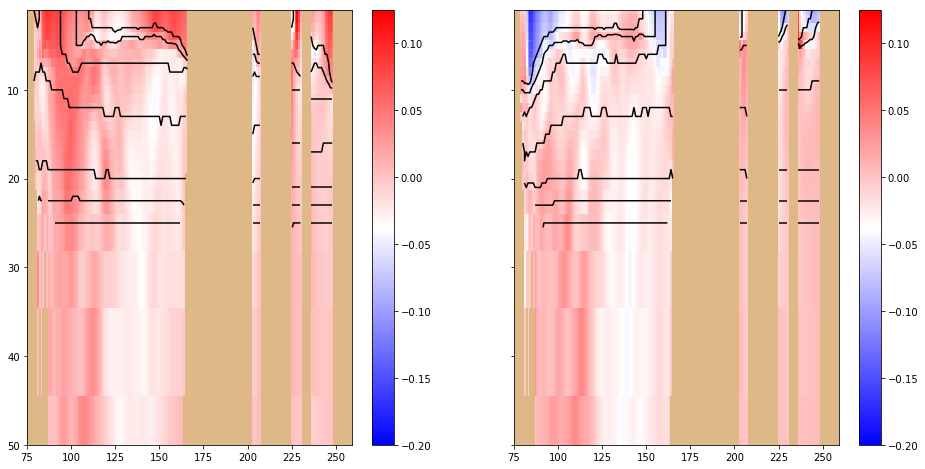

In [316]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,8))
land_colour = 'burlywood'

t, zmax, ylocn = 47, 50, 180
section_slice = np.arange(75, 260)
timestamp = nc_tools.timestamp(SN002V2, t)

vgrid_tzyx05 = np.ma.masked_values(vgrid05[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(
    section_slice[:], zlevels05[:zmax], vgrid_tzyx05,
    cmap=cmap, vmin=-0.2, vmax=0.125)
cbar = fig.colorbar(mesh, ax=ax1)
ax1.contour(masked_density11a,colors='black')
ax1.set_xlim((75,259))
ax1.set_ylim((50,1))

vgrid_tzyx06 = np.ma.masked_values(vgrid06[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax2.pcolormesh(
    section_slice[:], zlevels06[:zmax], vgrid_tzyx06,
    cmap=cmap, vmin=-0.2, vmax=0.125)
cbar = fig.colorbar(mesh, ax=ax2)
ax2.contour(masked_density12a,colors='black')
ax2.set_xlim((75,259))